source module for methodsNM imported.


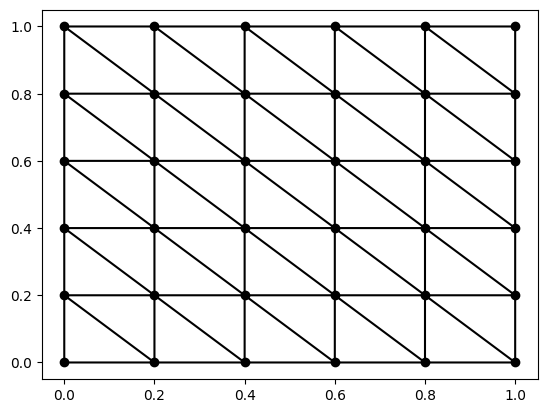

In [1]:
from import_hack import *
from methodsnm.mesh_2d import *
from methodsnm.visualize import *
mesh = StructuredRectangleMesh(5,5)
DrawMesh2D(mesh)

from methodsnm.fes import *
fes = P1_Triangle_Space(mesh)

## Verification Example: Solving the ODE *uₜ = t²*

In the following, we consider the simple ordinary differential equation:

$
\frac{\partial u}{\partial t} = t^2
$

This problem is purely time-dependent and serves as a minimal test case to verify the correct implementation of the time integral assembling procedure in the finite element framework.


l2diff = 0.002361419655105352


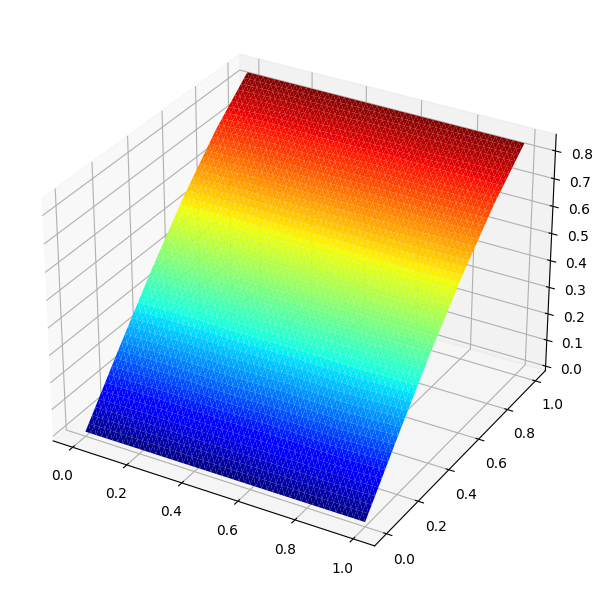

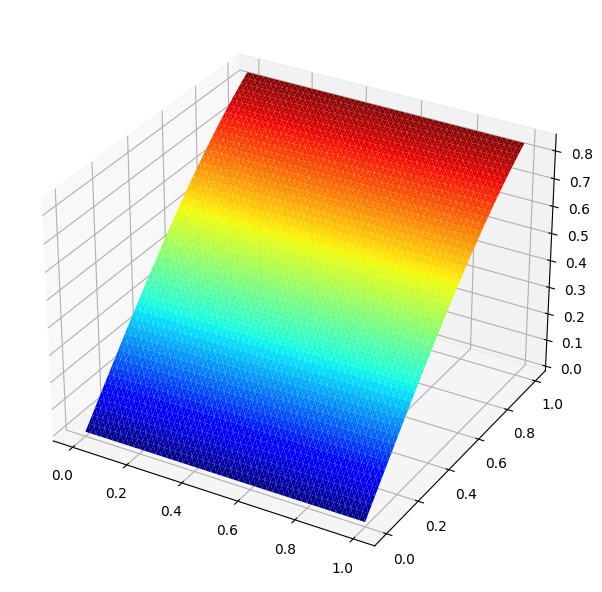

In [2]:
from methodsnm.forms import *
from methodsnm.formint import *
from numpy import pi, cos ,sin
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs

blf3 = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf3 += TimeIntegral(c)
blf3.assemble()

lf3 = LinearForm(fes)
f3 = GlobalFunction(lambda x: cos(x[1]), mesh = mesh)
lf3 += SourceIntegral(f3)
lf3.assemble()

def list_diff(a, b):
    """Entfernt alle Elemente aus Liste a, die in Liste b enthalten sind."""
    return [x for x in a if x not in b]

uh3 = FEFunction(fes)
f4 = lambda x: sin(x[1])
uh3._set(f4, True)
res = lf3.vector - blf3.matrix.dot(uh3.vector)

from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs
freedofs = list_diff(mesh.vertices,mesh.bndry_vertices)
uh3.vector += solve_on_freedofs(blf3.matrix,res,freedofs)
from methodsnm.forms import compute_difference_L2

uex =  GlobalFunction(f4, mesh = mesh)
l2diff = compute_difference_L2(uh3, uex, mesh, intorder = 5)

print("l2diff =", l2diff)
DrawFunction2D(uh3)
DrawFunction2D(uex)

## Verification Example: Solving the ODE $u_{xx} = x²$

In the following, we consider the simple ordinary differential equation:

$
-\Delta u(x) = f(x), \quad x \in \Omega
$

This problem is purely location-dependent and serves as a minimal test case to verify the correct implementation of the time integral assembling procedure in the finite element framework.

## Verification Example: Solving the parabolic PDE 

In the following, we consider the simple ordinary differential equation:

$-\Delta u + \frac{\partial u}{\partial t} = f$

This problem is purely time-dependent and serves as a minimal test case to verify the correct implementation of the time integral assembling procedure in the finite element framework.

l2diff = 0.3020003708093587


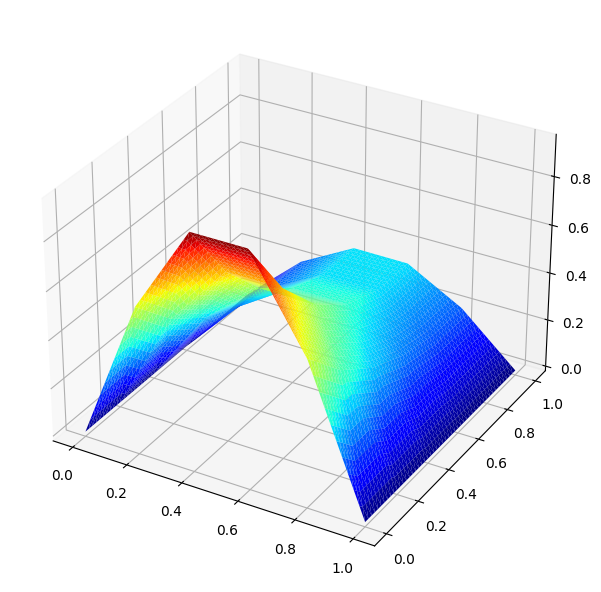

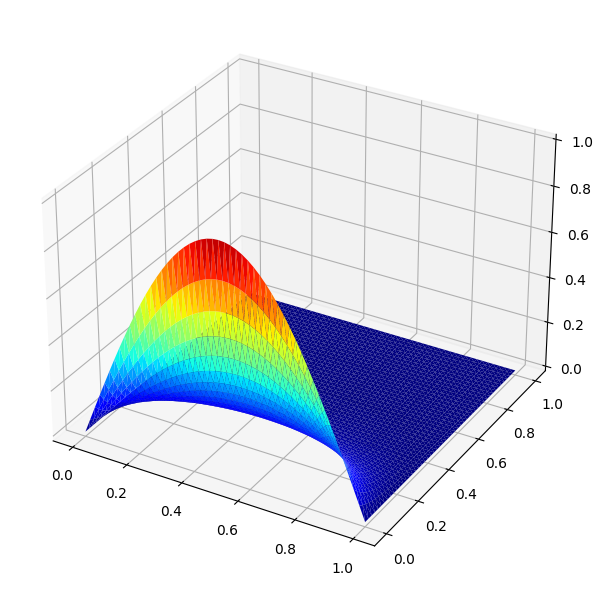

In [ ]:


blf3 = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf3 += TimeIntegral(c)
blf3 += LaplaceIntegral_without_time1(c)
blf3.assemble()

lf3 = LinearForm(fes)
f3 = GlobalFunction(lambda x: 0, mesh = mesh)
lf3 += SourceIntegral(f3)
lf3.assemble()
                                                                                                                   
def list_diff(a, b):
    """Entfernt alle Elemente aus Liste a, die in Liste b enthalten sind."""
    return [x for x in a if x not in b]

top = mesh.filter_bndry_points("max",1)
bottom = mesh.filter_bndry_points("min",1)
left = mesh.filter_bndry_points("min",0)
right = mesh.filter_bndry_points("max",0)
bndry = left + right + bottom


uh3 = FEFunction(fes)
f4 = lambda x: sin(pi*x[0])
uh3._set(f4, bndry)
res = lf3.vector - blf3.matrix.dot(uh3.vector)

from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs
freedofs = list_diff(mesh.vertices,bndry)
uh3.vector += solve_on_freedofs(blf3.matrix,res,freedofs)
from methodsnm.forms import compute_difference_L2

uex =  GlobalFunction(lambda x: sin(pi*x[0])*np.exp(-x[1]*pi**2), mesh = mesh)
l2diff = compute_difference_L2(uh3, uex, mesh, intorder = 5)

print("l2diff =", l2diff)
DrawFunction2D(uh3)
DrawFunction2D(uex)